In [433]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Section 1 - Importing and Exploring the Data

In [435]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [436]:
## Inspect the data frame

In [437]:
## check the dimensions of the dataframe
df.shape

(9240, 37)

In [438]:
##look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [439]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Section 2 -Data Cleaning and Preparation

In [441]:
# Check the number of missing values in each column

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### <span style='color:green'>There are lot of coloumns with significant missing values,
##### <span style='color:green'>We will explore the data further and decide whether to drop the corresponding coloumns or replace them with appropriate varibale
</span>

In [443]:
# Checking for duplicates and dropping the entire duplicate row if any:-
df.drop_duplicates(subset=None, inplace=True)

In [444]:
df.shape

(9240, 37)

In [445]:
# Replacing'Select' with NaN'  :-
df = df.replace('Select', np.nan)

In [446]:
# re check the number of missing values in each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [447]:
#Checking percentage of missing/null values :-

round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Observations and Action Plan
Asymmetrique Activity Index                     
Asymmetrique Profile Index                       
Asymmetrique Profile Score   
Asymmetrique Profile Score

These 4 colmouns have 50% of thier data missing

    How did you hear about X Education  -80% data missing
    lead profile -75 % data missing
    lead quality -51 % data missing 
    City coloumns is missing 40% of data

We will drop Aymmetrique columns (4 of them) , Lead profile and lead quality 
Since 40% data is missing for city we will have to examing the city data in detail and decide to drop the column or not

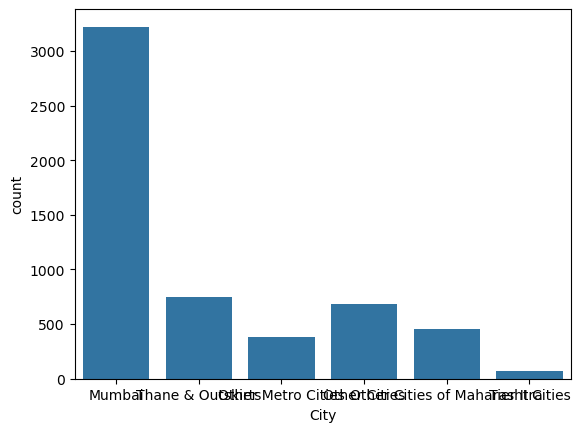

In [449]:
sns.countplot(x="City",data=df)
plt.show()

In [450]:
df.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

##### <span style='color:green'>Further examination of data indicates that most of leads are from Mumbai though it makes sense to impute the missing values with mumbai , but the data will be heavily skewed towards nmumbai. Hence its better to drop the city coloumn </span>

### Dropping Columns with missing values more than 30%

In [453]:
drop_Col = df.columns[100*(df.isnull().sum()/len(df)) > 30]
print(drop_Col)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [454]:
drop_Col=drop_Col.drop('Specialization')

In [455]:
# Will create a copy of original dataframe

df1=df.copy()

In [456]:
## Dropping the columns

df1 = df1.drop(drop_Col, axis=1).copy()

In [457]:
## Checking the shape of new dataframe

df1.shape

(9240, 28)

In [458]:
#Checking percentage of missing/null values :-

round(100*(df1.isnull().sum()/len(df1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

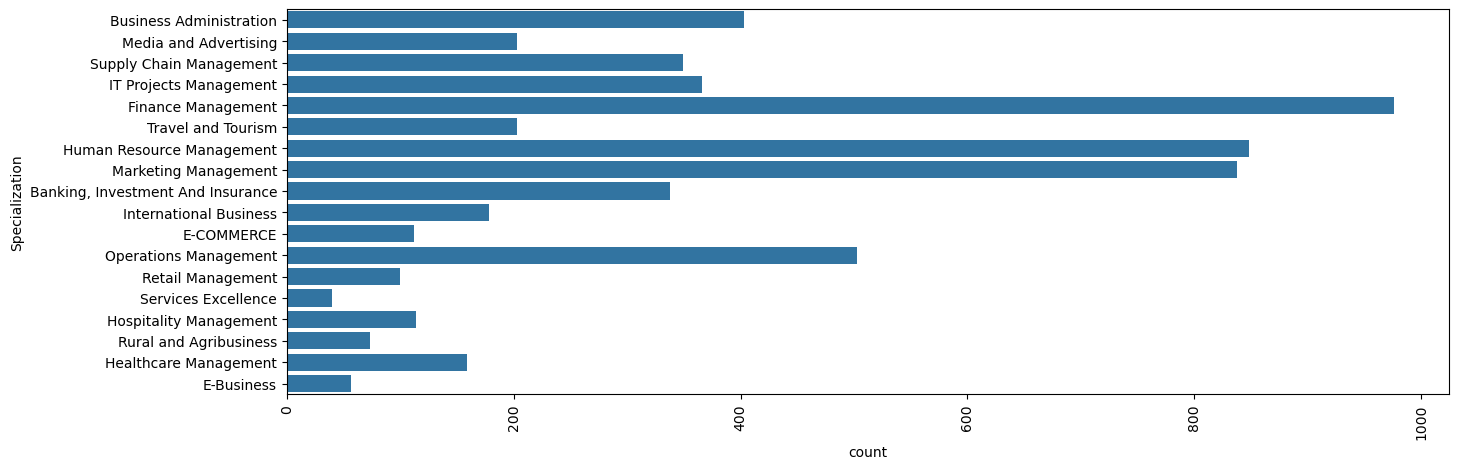

In [459]:
## Let Check the distribution of specialization in details
plt.figure(figsize=(15,5))
sns.countplot(df1['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [460]:
df1.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

#### We will not drop this column as its important to understand the realtionship with educational background (stream )
##### we will replace the missing values with "other" 

In [462]:
df1['Specialization'].fillna('Other',inplace=True)

In [463]:
df1["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

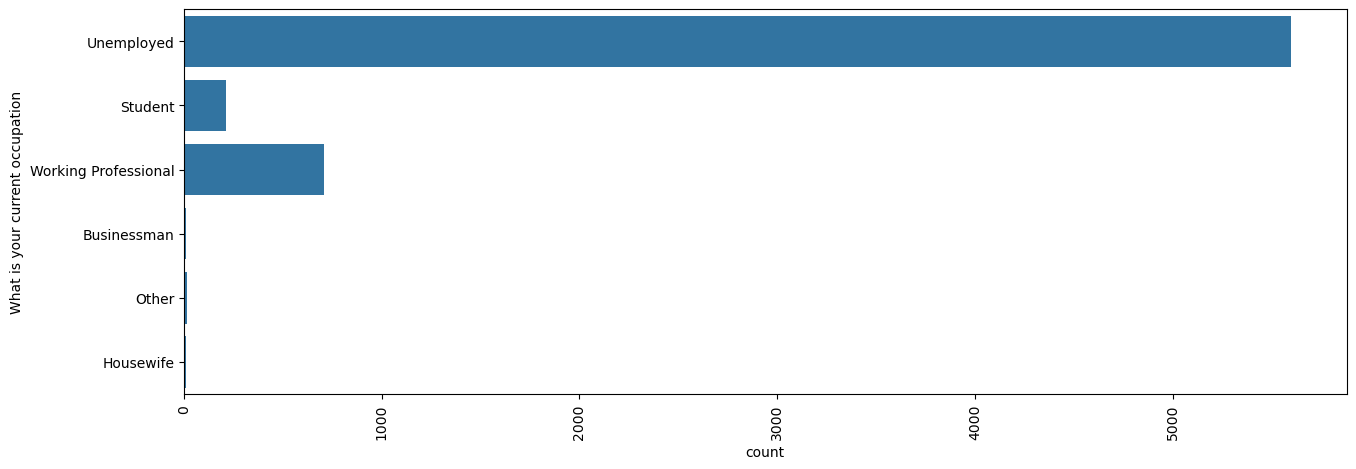

In [464]:
## Let Check the distribution of What is your current occupation in details
plt.figure(figsize=(15,5))
sns.countplot(df1['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [465]:
##### we will replace the missing values with "other" 
df1['What is your current occupation'].fillna('Other',inplace=True)

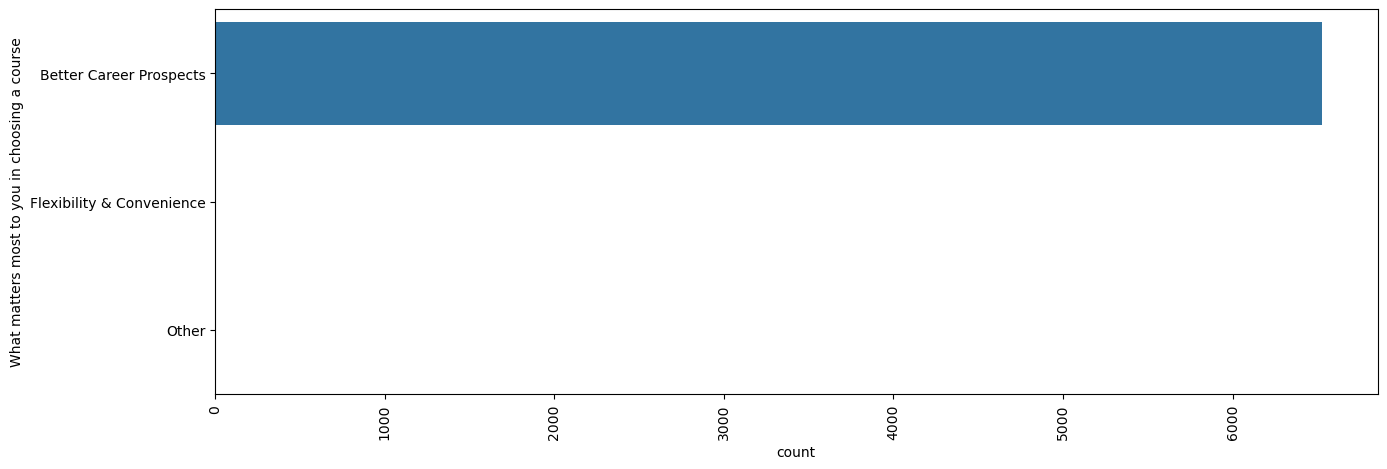

In [466]:
## Let Check the distribution of What matters most to you in choosing a course in detail
plt.figure(figsize=(15,5))
sns.countplot(df1['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [467]:
df1["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

##### From examination its clear that the "better career prospects is the most prevalent choice
##### We can choose to drop the column as any major inisght could be generated from this varible. 
##### But we will keep it at this point and replace all the missing variable with the frequent one.


In [469]:
df1['What matters most to you in choosing a course'].fillna('Better Career Prospects ',inplace=True)

In [470]:
# Checking value counts of 'Country' column:-

df1.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

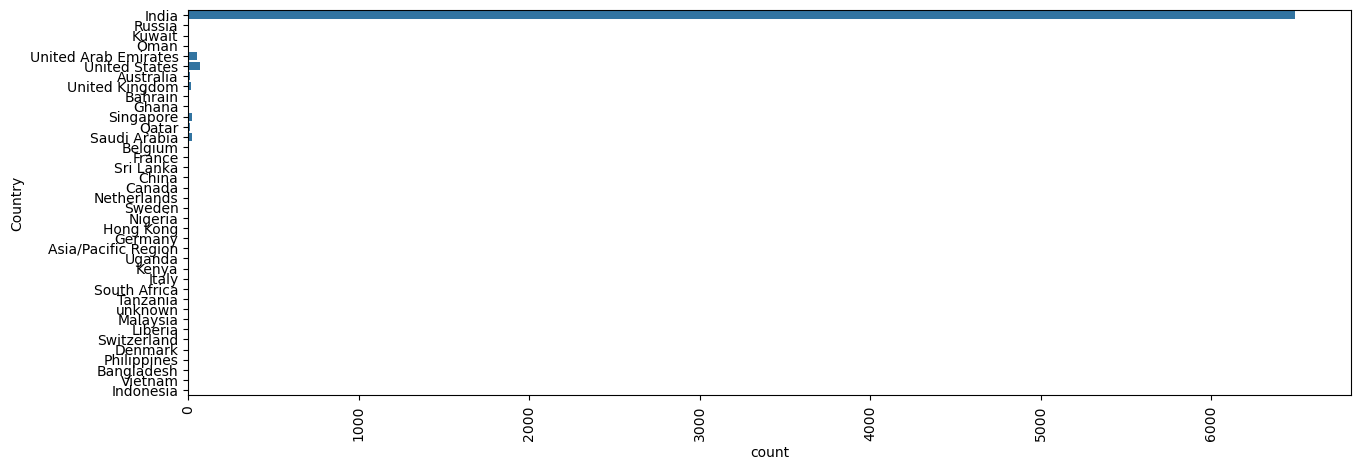

In [471]:
plt.figure(figsize=(15,5))
sns.countplot(df1['Country'])
plt.xticks(rotation=90)
plt.show()

##### Again a highly skewed data with more one data set being very dominant , we will replace the missing values with frequent one ("India) in this case

In [473]:
df1['Country'].fillna('India',inplace=True)

In [474]:
## Let Check the distribution of lead source in detail
df1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Most of the leads are from google followed by direc traffic, since only 0.39% of data is missing ,we can replace the missing values with Google without skewing the data

In [476]:
df1['Lead Source']=df1['Lead Source'].replace('google','Google')

#### before replacing with Google there are couple of datasets with google ,we will replace the lowercase one with Uppercase and ensure consistencey

In [478]:
df1['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [479]:
df1['Lead Source'].fillna('Google',inplace=True)

In [480]:
df1['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### Again its very clear over here , we can replace the missing values with Email opened as it is the most frequent one

In [482]:
df1['Last Activity'].fillna('Email Opened',inplace=True)

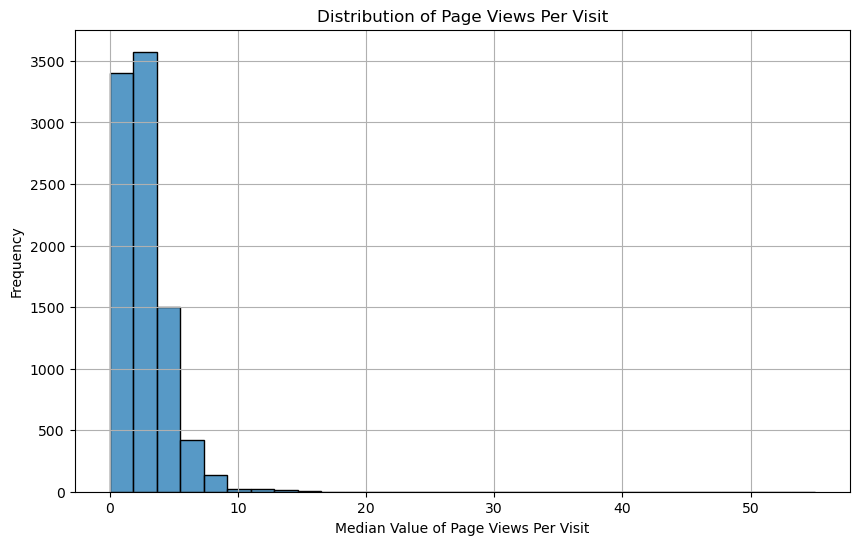

In [483]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Page Views Per Visit', bins=30)
plt.title('Distribution of Page Views Per Visit')
plt.xlabel('Median Value of Page Views Per Visit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

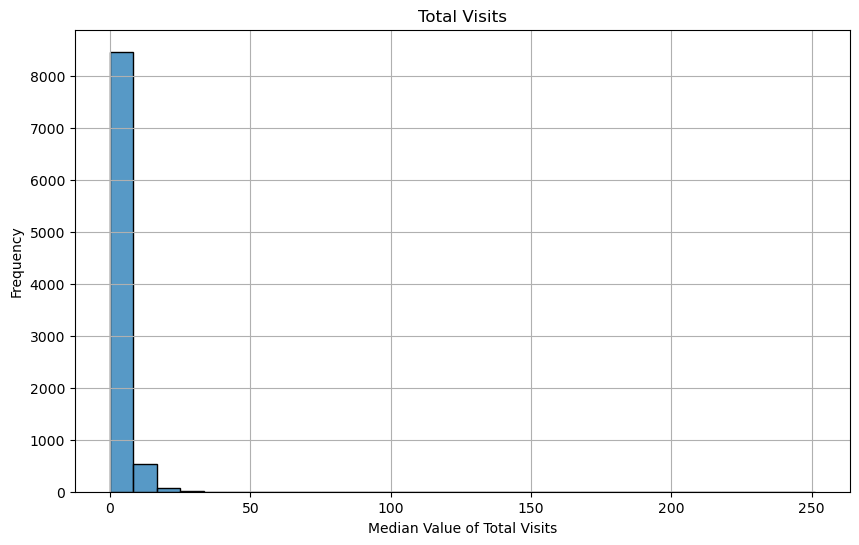

In [484]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='TotalVisits', bins=30)
plt.title('Total Visits')
plt.xlabel('Median Value of Total Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [485]:
## Replacing the missing values with median values for Total visit and page view per visit varibales
df1['TotalVisits'].fillna(df1['TotalVisits'].median(), inplace=True)
df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].median(), inplace=True)

In [486]:
df1.shape

(9240, 28)

In [487]:
#Checking percentage of missing/null values :-

round(100*(df1.isnull().sum()/len(df1)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### Notes
#### We have sucesfully addressed all the missing variables. we will move forward with subsequent tasks

In [489]:
# Checking if there are columns with one unique value since it won't affect our analysis
df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [490]:
## We will check for presence of data imbalnace in the dataframe
# Loop through each column in the DataFrame
for column in df1.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        class_counts = df[column].value_counts()
        imbalance_ratio = class_counts.max() / class_counts.min() if class_counts.min() > 0 else float('inf')
        
        print(f"Column: {column}")
        print("Class Counts:")
        print(class_counts)
        print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
        print("-------------")

Column: Prospect ID
Class Counts:
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Imbalance Ratio: 1.00
-------------
Column: Lead Origin
Class Counts:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Imbalance Ratio: 4886.00
-------------
Column: Lead Source
Class Counts:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       

## Note
do not email , do not call , search , magazine , x education forums , news paper, digital advertisment , recommendations , recive more updates, update me on supply chain content , get updates on dm seems to be highly skewed and careful examination shows that they are not critical variable sand wont be significant contributors for analysis . Considering this we will drop these columns.

In [492]:
##Dropping irreleavnt columns 
df1.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [493]:
df1.shape

(9240, 15)

In [494]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,No,Modified


In [495]:
## Dropping country varible as it is highly skewed , earlier we decided to keep the varible but it seems better to delete the varible due to high degree of skweness

In [496]:
df1.drop('Country',axis=1,inplace=True)

In [497]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [498]:
## Prospect ID and lead number are unique numbers assigned to lead. we will keep only one of them. in this case we can drop prospect id.

In [499]:
df1.drop('Prospect ID',axis=1,inplace=True)

In [500]:
df1.drop("Last Notable Activity",axis=1,inplace=True)

In [501]:
df1.shape

(9240, 12)

In [502]:
## "Droping do not email' as it is highly imbalanced
df1.drop('Do Not Email',axis=1,inplace=True)

# Section 3 - EDA

In [504]:
#Checking value count of target variable 'Converted':-
df1.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

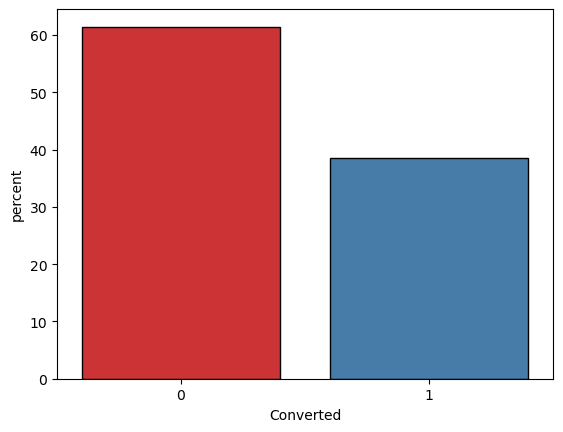

In [505]:
sns.countplot(df1, x="Converted",stat="percent",palette = "Set1",edgecolor = "black")
plt.show()

### Note 
60% of leads are not converted

### Note
 Lets start analyzing the categorical varibles

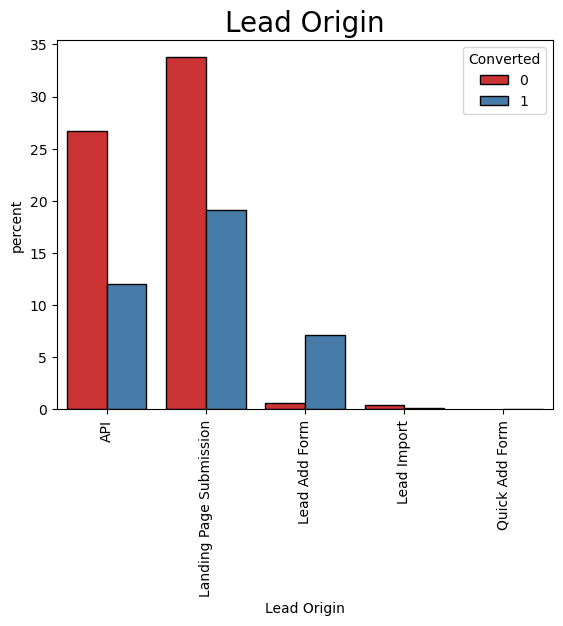

In [508]:
sns.countplot(df1, x="Lead Origin",stat="percent",palette = "Set1",edgecolor = "black",hue="Converted")
plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
plt.show()

#### Observerations
API and landing page contntibutes to maximum lead generation

Intrestingly Lead Add form has a better conversion rate  compared to others lead mechanisms

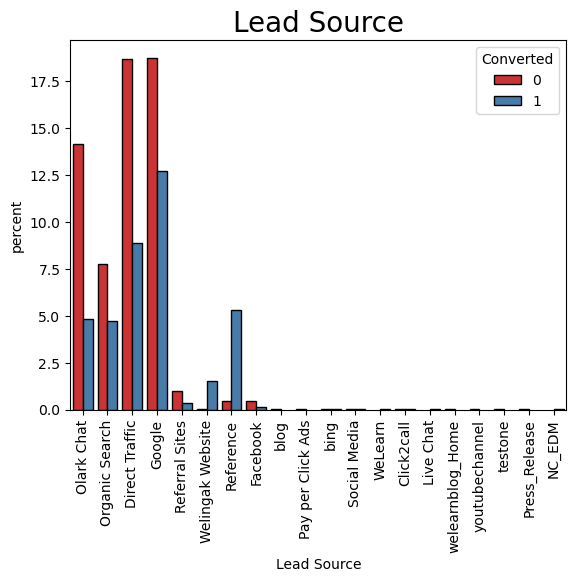

In [510]:
##plt.figure(figsize = (25,5))
sns.countplot(df1, x="Lead Source",stat="percent",palette = "Set1",edgecolor = "black",hue="Converted")
plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)
plt.show()

### Note 
Direct traffic and Google are major lead generators
Reference though accounts for smaller percengantage in terms of lead generation is has better conversion rates
Olak chart, organic search , Direct and Google ,Reference are the major soruces and more epmhazis should be put in for converting these leads

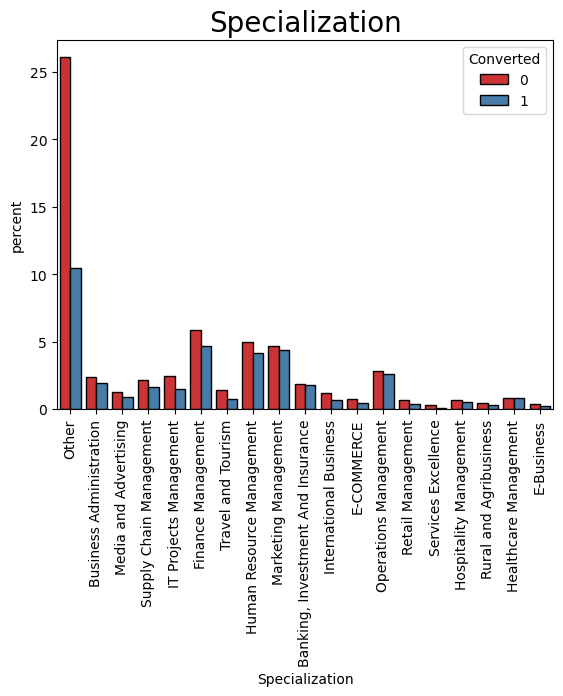

In [512]:
sns.countplot(df1, x="Specialization",stat="percent",palette = "Set1",edgecolor = "black",hue="Converted")
plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)
plt.show()

### Note

People with  Finance, HR and Marketing background accounts for 15% percentage of total population.Also they have a better conversion rate.  significant chunk of population comes from non specified categorty 

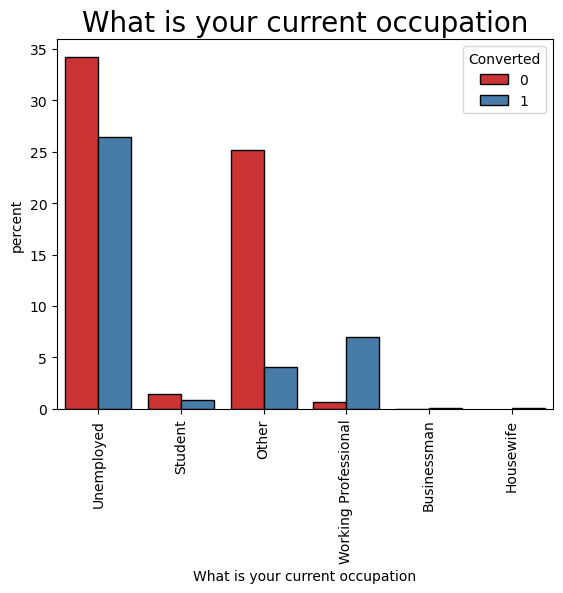

In [514]:
sns.countplot(df1, x="What is your current occupation",stat="percent",palette = "Set1",edgecolor = "black",hue="Converted")
plt.xticks(rotation = 90)
plt.title('What is your current occupation',fontsize=20)
plt.show()

### Note
Unemployed category leads to maximum chunk of leads and that also offer better conversion rate. 
Better conversion rates are observed with working professional
Unspecifed category though contributes to significant amount of leads the conversion rate is poor
Focus on reaching out to working professional and other category for better conversion

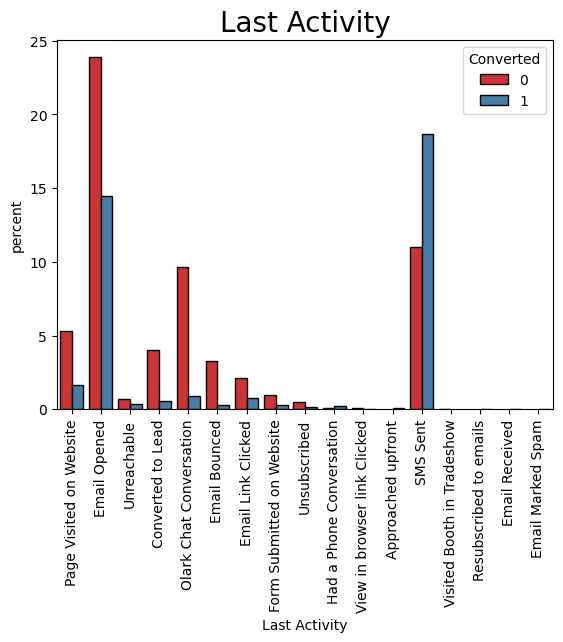

In [516]:
sns.countplot(df1, x="Last Activity",stat="percent",palette = "Set1",edgecolor = "black",hue="Converted")
plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)
plt.show()

### Note
from a onboarding process perspective ,Email and Sms are the best performing medium. Intrestingly sms has better conversion rate and accounts for significant leads. Careful introspection into the data can reveal that other forms of convesation are not at all effective interms of lead generation or conversion

### Note
 Lets start analyzing the numerical varibles

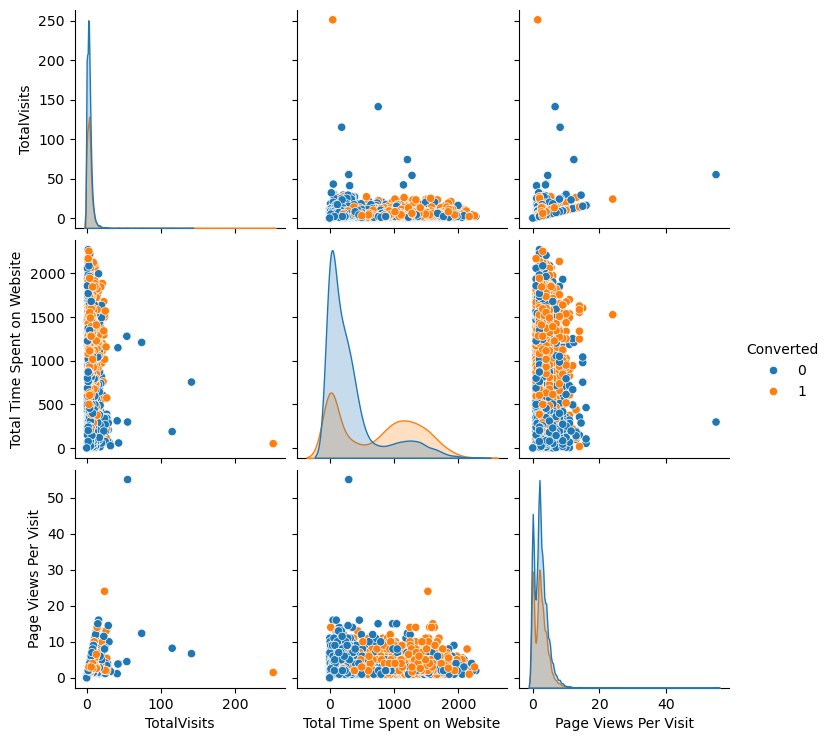

In [519]:
temp_var = df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(temp_var,diag_kind='kde',hue='Converted')
plt.show()

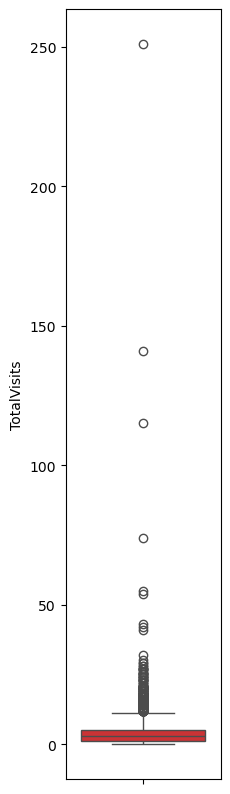

In [520]:
# Plotting box plots to visualize data distribution of 'TotalVisits':-
plt.figure(figsize = (2,10))
sns.boxplot(y=df1['TotalVisits'],palette='Set1')
plt.show()

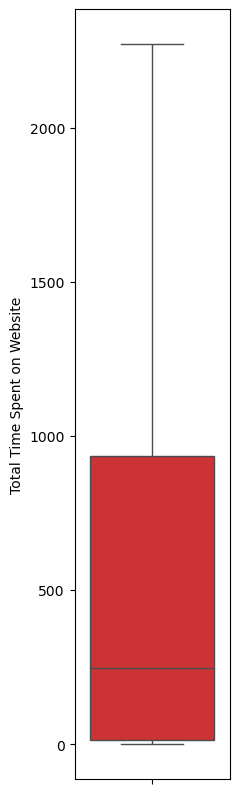

In [521]:
plt.figure(figsize = (2,10))
sns.boxplot(y=df1['Total Time Spent on Website'],palette='Set1')
plt.show()

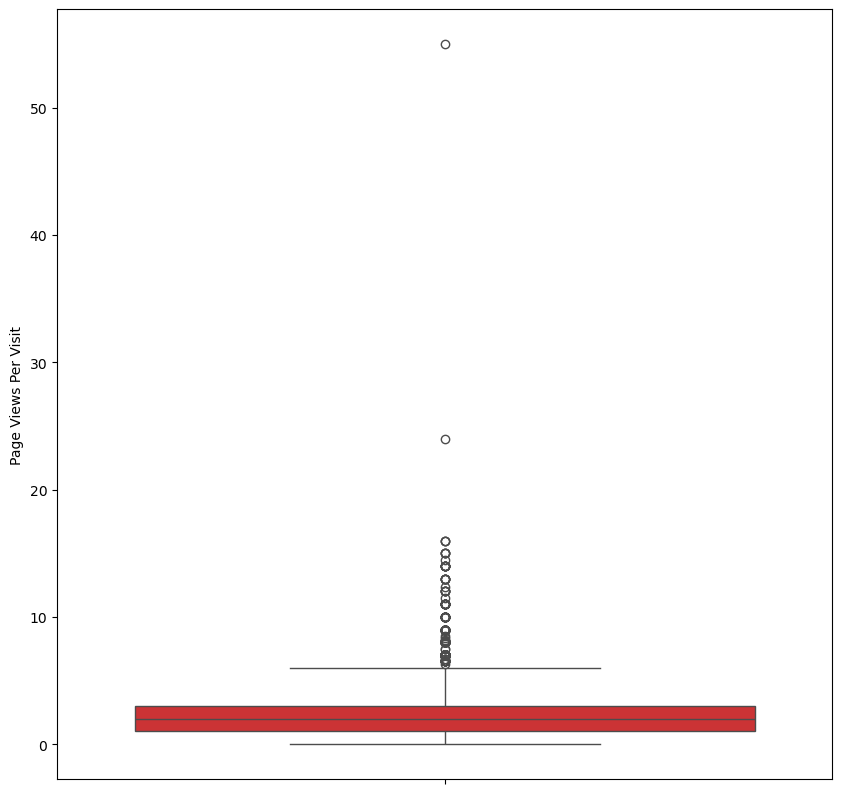

In [522]:
plt.figure(figsize = (10,10))
sns.boxplot(y=df1['Page Views Per Visit'],palette='Set1')
plt.show()

In [523]:
# Treating outliers by capping upper range to 0.99:-
Q3 = df1.TotalVisits.quantile(0.99)
df1 =df1[(df1.TotalVisits <= Q3)]

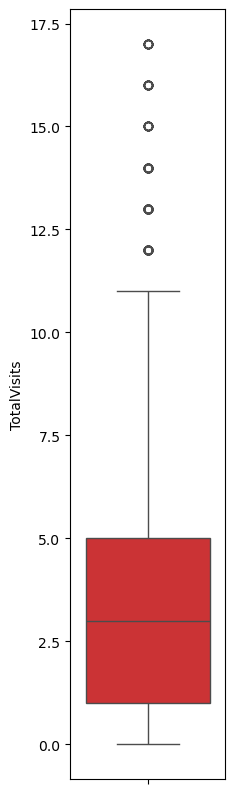

In [524]:
plt.figure(figsize = (2,10))
sns.boxplot(y=df1['TotalVisits'],palette='Set1')
plt.show()

In [525]:
# Treating outliers by capping upper range to 0.99:-
Q3 = df1['Page Views Per Visit'].quantile(0.99)
df1 =df1[(df1.TotalVisits <= Q3)]

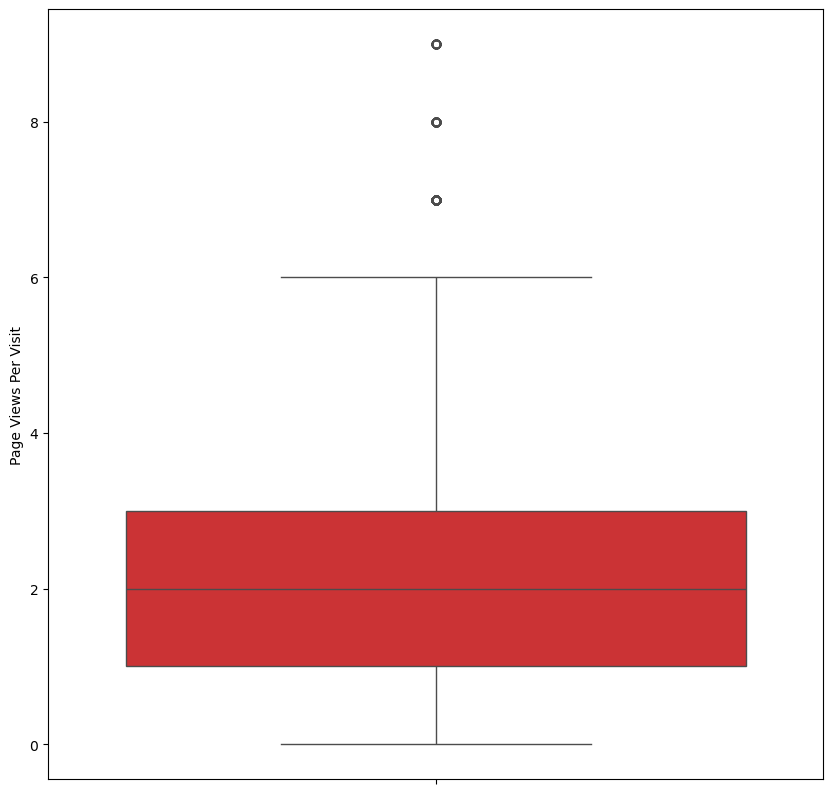

In [526]:
plt.figure(figsize = (10,10))
sns.boxplot(y=df1['Page Views Per Visit'],palette='Set1')
plt.show()

In [527]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8773 non-null   int64  
 1   Lead Origin                             8773 non-null   object 
 2   Lead Source                             8773 non-null   object 
 3   Converted                               8773 non-null   int64  
 4   TotalVisits                             8773 non-null   float64
 5   Total Time Spent on Website             8773 non-null   int64  
 6   Page Views Per Visit                    8773 non-null   float64
 7   Last Activity                           8773 non-null   object 
 8   Specialization                          8773 non-null   object 
 9   What is your current occupation         8773 non-null   object 
 10  A free copy of Mastering The Interview  8773 non-null   object 
d

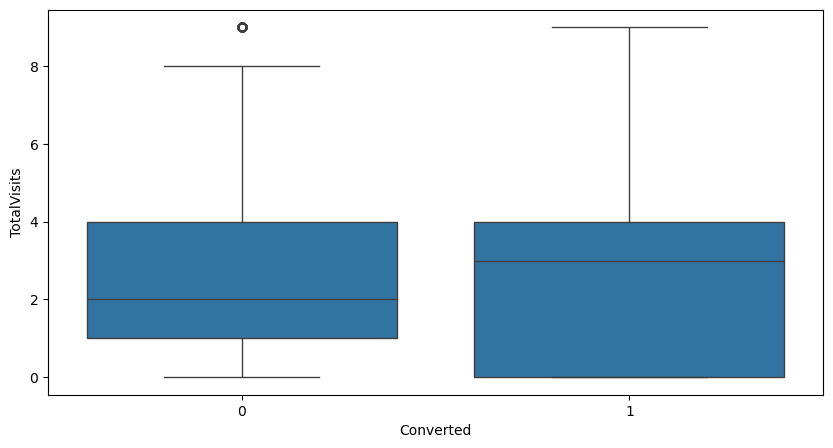

In [528]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df1)
plt.show()

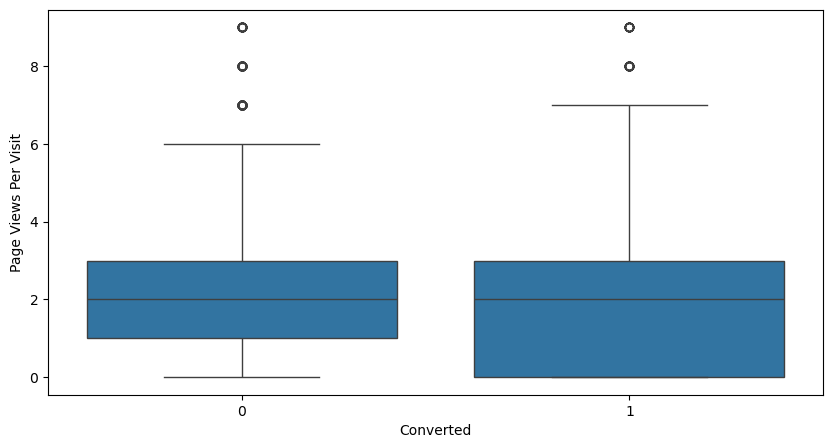

In [529]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df1)
plt.show()

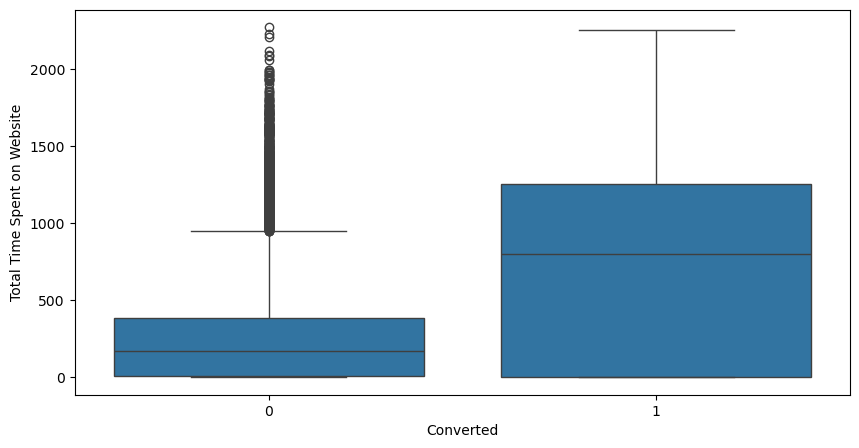

In [530]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df1)
plt.show()

### Note
From the above analysis we can conculde thatn the more the time spend  on website there is good chance for them to be converted.
So emphazis should be made on improving user experience on the website through ease of navigation and offering releavant and engaging contents

## Section 4 - Data Preparation for Analysis

In [533]:
df1.head(50)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Other,Unemployed,No
1,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Other,Unemployed,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Other,Unemployed,No
5,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,Other,No
6,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No
7,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,Other,No
8,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Other,Yes
9,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Other,No


In [534]:
var =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:-

df1[var] = df1[var].apply(binary_map)

df1.head(50)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Other,Unemployed,0
1,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Other,Unemployed,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Other,Unemployed,0
5,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,Other,0
6,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0
7,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other,Other,0
8,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Other,1
9,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Other,0


In [535]:
# Creating a dummy variable for the categorical variables
dummy_data = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True,dtype=int)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [536]:
# Adding dummy variables dataset 'dummy' to original dataset 'lead_df1':-

df1= pd.concat([dummy_data,df1],axis = 1)
df1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,1,...,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0
1,0,0,0,0,0,0,0,0,0,0,...,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,0
2,1,0,0,0,1,0,0,0,0,0,...,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,1,0,0,0,1,0,0,0,0,0,...,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,1,0,0,0,0,0,1,0,0,0,...,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0


In [537]:
# Dropping repeated columns for which dummy variables were created:-

df1.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization' ],axis=1,inplace = True)

In [538]:
df1.shape

(8773, 68)

## Step 5 
#### Test train split

In [540]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   8773 non-null   int32  
 1   Lead Origin_Lead Add Form                             8773 non-null   int32  
 2   Lead Origin_Lead Import                               8773 non-null   int32  
 3   Lead Origin_Quick Add Form                            8773 non-null   int32  
 4   Lead Source_Direct Traffic                            8773 non-null   int32  
 5   Lead Source_Facebook                                  8773 non-null   int32  
 6   Lead Source_Google                                    8773 non-null   int32  
 7   Lead Source_Live Chat                                 8773 non-null   int32  
 8   Lead Source_NC_EDM                                    8773 non-

In [541]:
X = df1.drop(['Lead Number','Converted'], axis=1)
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5.0,674,2.5,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,2.0,1428,1.0,0


In [542]:
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [543]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Next step -Feature Scaling

In [545]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
5602,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.080190,0.564722,0.423927,1
5036,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,-1.197787,-0.864237,-1.169949,0
8970,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,-0.771795,-0.271292,-0.638657,0
5328,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-0.345802,-0.455436,-0.107365,0
1929,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.932175,-0.466485,1.486511,0


## Step 6 Model Building

In [547]:
# Creating LogisticRegression Object called 'regressor':-
logreg = LogisticRegression()

In [548]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [549]:
#Displaying columns selected by RFE and their weights

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_blog', False, 3),
 ('Lead Source_testone', False, 4),
 ('Lead Source_welearnblog_Home', False, 4),
 ('Lead Source_youtubechannel', False, 4),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', Tr

In [550]:
# Storing columns selected by RFE into 'col' and displaying it:-
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
  

In [551]:
# Displaying columns which are not selected by RFE:-
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Received',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unsubscribed',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_O

In [552]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [553]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6107
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.5
Date:                Mon, 21 Oct 2024   Deviance:                       4909.0
Time:                        20:27:16   Pearson chi2:                 7.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.4190   3.38e+04      0.001      1.000   -6.63e+04    6.64e+04
Lead Origin_Landing Page Submission                     -1.0570      0.143     -7.368      0.000      -1.338      -0.776
Lead Origin_Lead Add Form                                3.1403      0.532      5.906      0.000       2.098       4.182
Lead Source_Direct Traffic                               0.0463      0.551      0.084      0.933      -1.035       1.127
Lead Source_Facebook                                     0.1638      0.688      0.238      0.812      -1.184       1.512
Lead Source_Google                                       0.2497      0.545      0.459      0.647      -0.818       1.317
Lead Source_Olark Chat                                   1.5330      0.562      2.727      0.006       0.431       2.635
Lead Source_Organic Search                               0.0994      0.558      0.178      0.859      -0.995       1.194
Lead Source_Referral Sites                               0.0256      0.655      0.039      0.969      -1.258       1.309
Lead Source_Social Media                                 1.7401      1.579      1.102      0.271      -1.355       4.835
Lead Source_Welingak Website                             2.4574      0.756      3.250      0.001       0.975       3.940
Last Activity_Converted to Lead                         -0.7232      0.251     -2.880      0.004      -1.215      -0.231
Last Activity_Email Bounced                             -1.4510      0.335     -4.325      0.000      -2.108      -0.794
Last Activity_Email Marked Spam                         21.2248   3.39e+04      0.001      1.000   -6.65e+04    6.65e+04
Last Activity_Email Opened                               0.3485      0.131      2.651      0.008       0.091       0.606
Last Activity_Form Submitted on Website                 -0.5388      0.359     -1.502      0.133      -1.242       0.164
Last Activity_Had a Phone Conversation                   0.8541      0.707      1.208      0.227      -0.531       2.239
Last Activity_Olark Chat Conversation                   -1.3244      0.214     -6.184      0.000      -1.744      -0.905
Last Activity_SMS Sent                                   1.5223      0.134     11.348      0.000       1.259       1.785
Last Activity_Unreachable                                0.6823      0.327      2.087      0.037       0.042       1.323
Last Activity_View in browser link Clicked             -21.2985   2.74e+04     -0.001      0.999   -5.37e+04    5.37e+04
What is your current occupation_Housewife                1.5505   3.71e+04   4.18e-05      1.000   -7.26e+04    7.26e+04
What is your current occupation_Other                  -22

In [554]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,What is your current occupation_Unemployed,115.57
21,What is your current occupation_Other,56.71
4,Lead Source_Google,55.84
2,Lead Source_Direct Traffic,50.25
5,Lead Source_Olark Chat,38.02
6,Lead Source_Organic Search,20.66
24,What is your current occupation_Working Profes...,14.20
1,Lead Origin_Lead Add Form,14.17
0,Lead Origin_Landing Page Submission,8.35
22,What is your current occupation_Student,5.60


In [555]:
## Ther are varibales with high VIF and P values - lets start removing them

In [556]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [557]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6108
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.9
Date:                Mon, 21 Oct 2024   Deviance:                       4909.8
Time:                        20:27:17   Pearson chi2:                 7.22e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6900      0.564     -1.223      0.221      -1.796       0.416
Lead Origin_Landing Page Submission                     -1.0569      0.143     -7.367      0.000      -1.338      -0.776
Lead Origin_Lead Add Form                                3.1418      0.532      5.909      0.000       2.100       4.184
Lead Source_Direct Traffic                               0.0412      0.551      0.075      0.940      -1.040       1.122
Lead Source_Facebook                                     0.1593      0.688      0.232      0.817      -1.189       1.507
Lead Source_Google                                       0.2458      0.545      0.451      0.652      -0.822       1.313
Lead Source_Olark Chat                                   1.5292      0.562      2.721      0.007       0.428       2.631
Lead Source_Organic Search                               0.0949      0.558      0.170      0.865      -0.999       1.189
Lead Source_Referral Sites                               0.0214      0.655      0.033      0.974      -1.262       1.305
Lead Source_Social Media                                 1.7351      1.579      1.099      0.272      -1.360       4.830
Lead Source_Welingak Website                             2.4522      0.756      3.243      0.001       0.970       3.934
Last Activity_Converted to Lead                         -0.7232      0.251     -2.879      0.004      -1.215      -0.231
Last Activity_Email Bounced                             -1.4510      0.336     -4.325      0.000      -2.109      -0.793
Last Activity_Email Marked Spam                         21.2218   3.39e+04      0.001      1.000   -6.65e+04    6.65e+04
Last Activity_Email Opened                               0.3496      0.131      2.659      0.008       0.092       0.607
Last Activity_Form Submitted on Website                 -0.5396      0.359     -1.504      0.133      -1.243       0.163
Last Activity_Had a Phone Conversation                   0.8537      0.707      1.208      0.227      -0.532       2.239
Last Activity_Olark Chat Conversation                   -1.3240      0.214     -6.182      0.000      -1.744      -0.904
Last Activity_SMS Sent                                   1.5225      0.134     11.347      0.000       1.259       1.785
Last Activity_Unreachable                                0.6823      0.327      2.087      0.037       0.041       1.323
Last Activity_View in browser link Clicked             -21.2971   2.74e+04     -0.001      0.999   -5.37e+04    5.37e+04
What is your current occupation_Housewife               22.6622   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What is your current occupation_Other                   -1

In [558]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Landing Page Submission,8.14
2,Lead Source_Direct Traffic,7.68
4,Lead Source_Google,7.33
5,Lead Source_Olark Chat,5.31
27,Specialization_Other,5.11
13,Last Activity_Email Opened,4.78
17,Last Activity_SMS Sent,4.15
6,Lead Source_Organic Search,3.47
16,Last Activity_Olark Chat Conversation,2.43
1,Lead Origin_Lead Add Form,2.30


In [559]:
## VIF has reduced , The P Values of some varible is reamin still high we wiil remove them in the subsequent steps

In [560]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [561]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6109
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2458.9
Date:                Mon, 21 Oct 2024   Deviance:                       4917.9
Time:                        20:27:17   Pearson chi2:                 7.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6735      0.564     -1.194      0.233      -1.779       0.432
Lead Origin_Landing Page Submission                     -1.0535      0.143     -7.346      0.000      -1.335      -0.772
Lead Origin_Lead Add Form                                3.1419      0.532      5.906      0.000       2.099       4.184
Lead Source_Direct Traffic                               0.0268      0.552      0.049      0.961      -1.054       1.108
Lead Source_Facebook                                     0.1411      0.688      0.205      0.837      -1.207       1.489
Lead Source_Google                                       0.2334      0.545      0.428      0.668      -0.834       1.301
Lead Source_Olark Chat                                   1.5117      0.562      2.689      0.007       0.410       2.613
Lead Source_Organic Search                               0.0930      0.558      0.167      0.868      -1.001       1.187
Lead Source_Referral Sites                               0.0113      0.655      0.017      0.986      -1.272       1.295
Lead Source_Social Media                                 1.7164      1.579      1.087      0.277      -1.378       4.811
Lead Source_Welingak Website                             2.4348      0.756      3.220      0.001       0.953       3.917
Last Activity_Converted to Lead                         -0.7295      0.251     -2.906      0.004      -1.222      -0.238
Last Activity_Email Bounced                             -1.4553      0.335     -4.339      0.000      -2.113      -0.798
Last Activity_Email Marked Spam                         20.2147   2.06e+04      0.001      0.999   -4.03e+04    4.04e+04
Last Activity_Email Opened                               0.3523      0.131      2.684      0.007       0.095       0.610
Last Activity_Form Submitted on Website                 -0.5451      0.359     -1.520      0.128      -1.248       0.158
Last Activity_Had a Phone Conversation                   0.8465      0.706      1.198      0.231      -0.538       2.231
Last Activity_Olark Chat Conversation                   -1.3239      0.214     -6.183      0.000      -1.743      -0.904
Last Activity_SMS Sent                                   1.5183      0.134     11.331      0.000       1.256       1.781
Last Activity_Unreachable                                0.6769      0.327      2.070      0.038       0.036       1.318
Last Activity_View in browser link Clicked             -20.2934   1.66e+04     -0.001      0.999   -3.26e+04    3.26e+04
What is your current occupation_Other                   -1.1655      0.091    -12.825      0.000      -1.344      -0.987
What is your current occupation_Student                  0

In [562]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Landing Page Submission,8.14
2,Lead Source_Direct Traffic,7.68
4,Lead Source_Google,7.33
5,Lead Source_Olark Chat,5.31
26,Specialization_Other,5.10
13,Last Activity_Email Opened,4.78
17,Last Activity_SMS Sent,4.15
6,Lead Source_Organic Search,3.47
16,Last Activity_Olark Chat Conversation,2.43
1,Lead Origin_Lead Add Form,2.29


In [563]:
X_train.drop('Last Activity_View in browser link Clicked', axis = 1, inplace = True)

In [564]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6110
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2459.7
Date:                Mon, 21 Oct 2024   Deviance:                       4919.3
Time:                        20:27:17   Pearson chi2:                 7.24e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6843      0.564     -1.213      0.225      -1.790       0.421
Lead Origin_Landing Page Submission                     -1.0513      0.143     -7.348      0.000      -1.332      -0.771
Lead Origin_Lead Add Form                                3.1455      0.532      5.912      0.000       2.103       4.188
Lead Source_Direct Traffic                               0.0264      0.552      0.048      0.962      -1.055       1.108
Lead Source_Facebook                                     0.1438      0.688      0.209      0.834      -1.205       1.492
Lead Source_Google                                       0.2335      0.545      0.429      0.668      -0.834       1.301
Lead Source_Olark Chat                                   1.5153      0.562      2.695      0.007       0.413       2.617
Lead Source_Organic Search                               0.0952      0.559      0.171      0.865      -0.999       1.190
Lead Source_Referral Sites                               0.0160      0.655      0.024      0.981      -1.268       1.300
Lead Source_Social Media                                 1.7213      1.580      1.090      0.276      -1.375       4.818
Lead Source_Welingak Website                             2.4351      0.756      3.220      0.001       0.953       3.917
Last Activity_Converted to Lead                         -0.7205      0.251     -2.872      0.004      -1.212      -0.229
Last Activity_Email Bounced                             -1.4466      0.335     -4.315      0.000      -2.104      -0.789
Last Activity_Email Marked Spam                         19.2224   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Last Activity_Email Opened                               0.3614      0.131      2.757      0.006       0.104       0.618
Last Activity_Form Submitted on Website                 -0.5365      0.359     -1.496      0.135      -1.239       0.166
Last Activity_Had a Phone Conversation                   0.8547      0.706      1.210      0.226      -0.530       2.239
Last Activity_Olark Chat Conversation                   -1.3149      0.214     -6.145      0.000      -1.734      -0.896
Last Activity_SMS Sent                                   1.5274      0.134     11.415      0.000       1.265       1.790
Last Activity_Unreachable                                0.6860      0.327      2.098      0.036       0.045       1.327
What is your current occupation_Other                   -1.1647      0.091    -12.815      0.000      -1.343      -0.987
What is your current occupation_Student                  0.1988      0.229      0.867      0.386      -0.251       0.648
What is your current occupation_Working Professional     2

In [565]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Landing Page Submission,8.14
2,Lead Source_Direct Traffic,7.66
4,Lead Source_Google,7.32
5,Lead Source_Olark Chat,5.30
25,Specialization_Other,5.10
13,Last Activity_Email Opened,4.76
17,Last Activity_SMS Sent,4.14
6,Lead Source_Organic Search,3.47
16,Last Activity_Olark Chat Conversation,2.43
1,Lead Origin_Lead Add Form,2.29


In [566]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [567]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6111
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.4
Date:                Mon, 21 Oct 2024   Deviance:                       4974.9
Time:                        20:27:18   Pearson chi2:                 6.96e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3297      0.557     -2.386      0.017      -2.422      -0.238
Lead Origin_Lead Add Form                                3.5076      0.532      6.589      0.000       2.464       4.551
Lead Source_Direct Traffic                              -0.3539      0.549     -0.644      0.519      -1.431       0.723
Lead Source_Facebook                                     0.3506      0.688      0.510      0.610      -0.997       1.699
Lead Source_Google                                       0.0600      0.545      0.110      0.912      -1.007       1.127
Lead Source_Olark Chat                                   1.6167      0.562      2.876      0.004       0.515       2.719
Lead Source_Organic Search                              -0.0648      0.558     -0.116      0.908      -1.159       1.029
Lead Source_Referral Sites                               0.0361      0.658      0.055      0.956      -1.254       1.326
Lead Source_Social Media                                 1.7995      1.522      1.182      0.237      -1.184       4.783
Lead Source_Welingak Website                             2.1086      0.754      2.798      0.005       0.631       3.586
Last Activity_Converted to Lead                         -0.7378      0.250     -2.953      0.003      -1.227      -0.248
Last Activity_Email Bounced                             -1.4914      0.330     -4.517      0.000      -2.139      -0.844
Last Activity_Email Marked Spam                         19.3523   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Activity_Email Opened                               0.3641      0.130      2.798      0.005       0.109       0.619
Last Activity_Form Submitted on Website                 -0.4473      0.350     -1.276      0.202      -1.134       0.240
Last Activity_Had a Phone Conversation                   0.8982      0.695      1.292      0.196      -0.464       2.261
Last Activity_Olark Chat Conversation                   -1.2456      0.210     -5.924      0.000      -1.658      -0.833
Last Activity_SMS Sent                                   1.4924      0.133     11.237      0.000       1.232       1.753
Last Activity_Unreachable                                0.6394      0.326      1.959      0.050      -0.000       1.279
What is your current occupation_Other                   -1.1988      0.090    -13.275      0.000      -1.376      -1.022
What is your current occupation_Student                  0.1610      0.224      0.720      0.471      -0.277       0.599
What is your current occupation_Working Professional     2.2995      0.192     11.989      0.000       1.924       2.675
Specialization_Healthcare Management                     0

In [568]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_Email Opened,4.76
3,Lead Source_Google,4.67
4,Lead Source_Olark Chat,4.54
16,Last Activity_SMS Sent,4.13
1,Lead Source_Direct Traffic,3.74
24,Specialization_Other,3.03
5,Lead Source_Organic Search,2.56
15,Last Activity_Olark Chat Conversation,2.43
0,Lead Origin_Lead Add Form,2.26
27,TotalVisits,2.26


In [569]:
##VIF has reduced and within limit , we need to remove varibles with Higher p values

In [570]:
X_train.drop('Last Activity_Email Marked Spam', axis = 1, inplace = True)

In [571]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6112
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.0
Date:                Mon, 21 Oct 2024   Deviance:                       4975.9
Time:                        20:27:18   Pearson chi2:                 6.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3173      0.557     -2.365      0.018      -2.409      -0.226
Lead Origin_Lead Add Form                                3.5114      0.532      6.596      0.000       2.468       4.555
Lead Source_Direct Traffic                              -0.3602      0.549     -0.656      0.512      -1.437       0.716
Lead Source_Facebook                                     0.3455      0.688      0.502      0.615      -1.003       1.694
Lead Source_Google                                       0.0528      0.545      0.097      0.923      -1.015       1.120
Lead Source_Olark Chat                                   1.6118      0.562      2.867      0.004       0.510       2.714
Lead Source_Organic Search                              -0.0720      0.558     -0.129      0.897      -1.166       1.022
Lead Source_Referral Sites                               0.0283      0.658      0.043      0.966      -1.261       1.318
Lead Source_Social Media                                 1.7899      1.522      1.176      0.240      -1.193       4.773
Lead Source_Welingak Website                             2.0997      0.754      2.786      0.005       0.623       3.577
Last Activity_Converted to Lead                         -0.7432      0.250     -2.977      0.003      -1.233      -0.254
Last Activity_Email Bounced                             -1.4974      0.330     -4.536      0.000      -2.144      -0.850
Last Activity_Email Opened                               0.3580      0.130      2.758      0.006       0.104       0.612
Last Activity_Form Submitted on Website                 -0.4537      0.350     -1.295      0.195      -1.140       0.233
Last Activity_Had a Phone Conversation                   0.8925      0.695      1.284      0.199      -0.470       2.255
Last Activity_Olark Chat Conversation                   -1.2512      0.210     -5.955      0.000      -1.663      -0.839
Last Activity_SMS Sent                                   1.4865      0.133     11.218      0.000       1.227       1.746
Last Activity_Unreachable                                0.6336      0.326      1.942      0.052      -0.006       1.273
What is your current occupation_Other                   -1.1993      0.090    -13.280      0.000      -1.376      -1.022
What is your current occupation_Student                  0.1599      0.224      0.715      0.475      -0.278       0.598
What is your current occupation_Working Professional     2.2986      0.192     11.983      0.000       1.923       2.675
Specialization_Healthcare Management                     0.3664      0.282      1.300      0.194      -0.186       0.919
Specialization_Hospitality Management                   -0

In [572]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Opened,4.75
3,Lead Source_Google,4.66
4,Lead Source_Olark Chat,4.53
15,Last Activity_SMS Sent,4.12
1,Lead Source_Direct Traffic,3.73
23,Specialization_Other,3.03
5,Lead Source_Organic Search,2.56
14,Last Activity_Olark Chat Conversation,2.43
26,TotalVisits,2.26
0,Lead Origin_Lead Add Form,2.25


In [573]:
X_train.drop('Lead Source_Referral Sites', axis = 1, inplace = True)

In [574]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6113
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.0
Date:                Mon, 21 Oct 2024   Deviance:                       4975.9
Time:                        20:27:18   Pearson chi2:                 6.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2978      0.323     -4.014      0.000      -1.931      -0.664
Lead Origin_Lead Add Form                                3.4939      0.341     10.232      0.000       2.825       4.163
Lead Source_Direct Traffic                              -0.3796      0.311     -1.222      0.222      -0.988       0.229
Lead Source_Facebook                                     0.3258      0.513      0.635      0.525      -0.679       1.331
Lead Source_Google                                       0.0334      0.303      0.110      0.912      -0.561       0.628
Lead Source_Olark Chat                                   1.5921      0.324      4.907      0.000       0.956       2.228
Lead Source_Organic Search                              -0.0917      0.318     -0.289      0.773      -0.714       0.531
Lead Source_Social Media                                 1.7705      1.453      1.218      0.223      -1.078       4.619
Lead Source_Welingak Website                             2.0974      0.752      2.790      0.005       0.624       3.571
Last Activity_Converted to Lead                         -0.7432      0.250     -2.976      0.003      -1.233      -0.254
Last Activity_Email Bounced                             -1.4967      0.330     -4.542      0.000      -2.143      -0.851
Last Activity_Email Opened                               0.3578      0.130      2.758      0.006       0.103       0.612
Last Activity_Form Submitted on Website                 -0.4538      0.350     -1.295      0.195      -1.141       0.233
Last Activity_Had a Phone Conversation                   0.8929      0.695      1.285      0.199      -0.469       2.255
Last Activity_Olark Chat Conversation                   -1.2513      0.210     -5.956      0.000      -1.663      -0.840
Last Activity_SMS Sent                                   1.4864      0.132     11.219      0.000       1.227       1.746
Last Activity_Unreachable                                0.6335      0.326      1.942      0.052      -0.006       1.273
What is your current occupation_Other                   -1.1993      0.090    -13.281      0.000      -1.376      -1.022
What is your current occupation_Student                  0.1597      0.224      0.714      0.475      -0.278       0.598
What is your current occupation_Working Professional     2.2986      0.192     11.983      0.000       1.923       2.675
Specialization_Healthcare Management                     0.3666      0.282      1.301      0.193      -0.186       0.919
Specialization_Hospitality Management                   -0.6328      0.354     -1.788      0.074      -1.326       0.061
Specialization_Media and Advertising                    -0

In [575]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,4.39
4,Lead Source_Olark Chat,4.21
3,Lead Source_Google,4.15
14,Last Activity_SMS Sent,3.86
1,Lead Source_Direct Traffic,3.43
22,Specialization_Other,2.86
13,Last Activity_Olark Chat Conversation,2.35
5,Lead Source_Organic Search,2.33
25,TotalVisits,2.19
0,Lead Origin_Lead Add Form,2.19


In [576]:
X_train.drop('Lead Source_Facebook', axis = 1, inplace = True)

In [577]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6114
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.2
Date:                Mon, 21 Oct 2024   Deviance:                       4976.3
Time:                        20:27:19   Pearson chi2:                 6.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1914      0.272     -4.380      0.000      -1.725      -0.658
Lead Origin_Lead Add Form                                3.3912      0.296     11.451      0.000       2.811       3.972
Lead Source_Direct Traffic                              -0.4867      0.256     -1.900      0.057      -0.989       0.015
Lead Source_Google                                      -0.0719      0.249     -0.289      0.773      -0.560       0.416
Lead Source_Olark Chat                                   1.4790      0.267      5.547      0.000       0.956       2.002
Lead Source_Organic Search                              -0.1971      0.266     -0.740      0.459      -0.719       0.325
Lead Source_Social Media                                 1.6634      1.443      1.153      0.249      -1.164       4.491
Lead Source_Welingak Website                             2.0855      0.752      2.775      0.006       0.613       3.559
Last Activity_Converted to Lead                         -0.7453      0.250     -2.986      0.003      -1.235      -0.256
Last Activity_Email Bounced                             -1.4880      0.328     -4.531      0.000      -2.132      -0.844
Last Activity_Email Opened                               0.3610      0.130      2.785      0.005       0.107       0.615
Last Activity_Form Submitted on Website                 -0.4527      0.350     -1.292      0.196      -1.139       0.234
Last Activity_Had a Phone Conversation                   0.8865      0.696      1.273      0.203      -0.478       2.251
Last Activity_Olark Chat Conversation                   -1.2502      0.210     -5.953      0.000      -1.662      -0.839
Last Activity_SMS Sent                                   1.4889      0.132     11.245      0.000       1.229       1.748
Last Activity_Unreachable                                0.6334      0.326      1.942      0.052      -0.006       1.273
What is your current occupation_Other                   -1.2015      0.090    -13.318      0.000      -1.378      -1.025
What is your current occupation_Student                  0.1608      0.223      0.719      0.472      -0.277       0.599
What is your current occupation_Working Professional     2.2978      0.192     11.975      0.000       1.922       2.674
Specialization_Healthcare Management                     0.3713      0.281      1.319      0.187      -0.180       0.923
Specialization_Hospitality Management                   -0.6288      0.354     -1.775      0.076      -1.323       0.065
Specialization_Media and Advertising                    -0.3527      0.243     -1.448      0.148      -0.830       0.125
Specialization_Other                                    -0

In [578]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Email Opened,4.13
3,Lead Source_Olark Chat,4.00
2,Lead Source_Google,3.98
13,Last Activity_SMS Sent,3.71
1,Lead Source_Direct Traffic,3.30
21,Specialization_Other,2.82
12,Last Activity_Olark Chat Conversation,2.31
4,Lead Source_Organic Search,2.27
24,TotalVisits,2.19
0,Lead Origin_Lead Add Form,2.12


In [579]:
X_train.drop('Lead Source_Google', axis = 1, inplace = True)

In [580]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6115
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.2
Date:                Mon, 21 Oct 2024   Deviance:                       4976.4
Time:                        20:27:19   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2589      0.140     -8.998      0.000      -1.533      -0.985
Lead Origin_Lead Add Form                                3.4496      0.217     15.876      0.000       3.024       3.875
Lead Source_Direct Traffic                              -0.4179      0.094     -4.431      0.000      -0.603      -0.233
Lead Source_Olark Chat                                   1.5441      0.143     10.813      0.000       1.264       1.824
Lead Source_Organic Search                              -0.1285      0.120     -1.069      0.285      -0.364       0.107
Lead Source_Social Media                                 1.7313      1.423      1.216      0.224      -1.058       4.521
Lead Source_Welingak Website                             2.0922      0.751      2.785      0.005       0.620       3.564
Last Activity_Converted to Lead                         -0.7471      0.250     -2.994      0.003      -1.236      -0.258
Last Activity_Email Bounced                             -1.4905      0.329     -4.536      0.000      -2.135      -0.846
Last Activity_Email Opened                               0.3607      0.130      2.783      0.005       0.107       0.615
Last Activity_Form Submitted on Website                 -0.4543      0.350     -1.297      0.195      -1.141       0.232
Last Activity_Had a Phone Conversation                   0.8887      0.695      1.278      0.201      -0.474       2.251
Last Activity_Olark Chat Conversation                   -1.2512      0.210     -5.959      0.000      -1.663      -0.840
Last Activity_SMS Sent                                   1.4870      0.132     11.245      0.000       1.228       1.746
Last Activity_Unreachable                                0.6320      0.326      1.938      0.053      -0.007       1.271
What is your current occupation_Other                   -1.2016      0.090    -13.320      0.000      -1.378      -1.025
What is your current occupation_Student                  0.1606      0.223      0.719      0.472      -0.277       0.598
What is your current occupation_Working Professional     2.2982      0.192     11.979      0.000       1.922       2.674
Specialization_Healthcare Management                     0.3719      0.281      1.322      0.186      -0.180       0.923
Specialization_Hospitality Management                   -0.6271      0.354     -1.770      0.077      -1.321       0.067
Specialization_Media and Advertising                    -0.3529      0.243     -1.450      0.147      -0.830       0.124
Specialization_Other                                    -0.2778      0.098     -2.848      0.004      -0.469      -0.087
Specialization_Retail Management                        -0

In [581]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,2.92
20,Specialization_Other,2.69
8,Last Activity_Email Opened,2.13
23,TotalVisits,2.02
12,Last Activity_SMS Sent,1.96
0,Lead Origin_Lead Add Form,1.85
11,Last Activity_Olark Chat Conversation,1.80
1,Lead Source_Direct Traffic,1.73
14,What is your current occupation_Other,1.61
3,Lead Source_Organic Search,1.37


In [582]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [583]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6116
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.5
Date:                Mon, 21 Oct 2024   Deviance:                       4976.9
Time:                        20:27:19   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2540      0.140     -8.976      0.000      -1.528      -0.980
Lead Origin_Lead Add Form                                3.4530      0.217     15.896      0.000       3.027       3.879
Lead Source_Direct Traffic                              -0.4160      0.094     -4.413      0.000      -0.601      -0.231
Lead Source_Olark Chat                                   1.5451      0.143     10.821      0.000       1.265       1.825
Lead Source_Organic Search                              -0.1289      0.120     -1.072      0.284      -0.364       0.107
Lead Source_Social Media                                 1.7241      1.423      1.211      0.226      -1.066       4.514
Lead Source_Welingak Website                             2.0834      0.751      2.774      0.006       0.611       3.555
Last Activity_Converted to Lead                         -0.7464      0.250     -2.990      0.003      -1.236      -0.257
Last Activity_Email Bounced                             -1.4863      0.329     -4.521      0.000      -2.131      -0.842
Last Activity_Email Opened                               0.3616      0.130      2.791      0.005       0.108       0.616
Last Activity_Form Submitted on Website                 -0.4583      0.350     -1.309      0.191      -1.145       0.228
Last Activity_Had a Phone Conversation                   0.8844      0.695      1.272      0.203      -0.478       2.247
Last Activity_Olark Chat Conversation                   -1.2465      0.210     -5.941      0.000      -1.658      -0.835
Last Activity_SMS Sent                                   1.4847      0.132     11.233      0.000       1.226       1.744
Last Activity_Unreachable                                0.6273      0.326      1.924      0.054      -0.012       1.266
What is your current occupation_Other                   -1.2073      0.090    -13.438      0.000      -1.383      -1.031
What is your current occupation_Working Professional     2.2925      0.192     11.962      0.000       1.917       2.668
Specialization_Healthcare Management                     0.3733      0.281      1.326      0.185      -0.178       0.925
Specialization_Hospitality Management                   -0.6244      0.355     -1.760      0.078      -1.320       0.071
Specialization_Media and Advertising                    -0.3560      0.243     -1.463      0.144      -0.833       0.121
Specialization_Other                                    -0.2769      0.098     -2.839      0.005      -0.468      -0.086
Specialization_Retail Management                        -0.4952      0.352     -1.408      0.159      -1.185       0.194
Specialization_Rural and Agribusiness                    0

In [584]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,2.92
19,Specialization_Other,2.69
8,Last Activity_Email Opened,2.12
22,TotalVisits,2.02
12,Last Activity_SMS Sent,1.95
0,Lead Origin_Lead Add Form,1.85
11,Last Activity_Olark Chat Conversation,1.79
1,Lead Source_Direct Traffic,1.72
14,What is your current occupation_Other,1.59
3,Lead Source_Organic Search,1.37


In [585]:
X_train.drop('Lead Source_Olark Chat', axis = 1, inplace = True)

In [586]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6117
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.4
Date:                Mon, 21 Oct 2024   Deviance:                       5100.7
Time:                        20:27:19   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8178      0.130     -6.299      0.000      -1.072      -0.563
Lead Origin_Lead Add Form                                2.6004      0.200     12.983      0.000       2.208       2.993
Lead Source_Direct Traffic                              -0.6742      0.089     -7.571      0.000      -0.849      -0.500
Lead Source_Organic Search                              -0.2894      0.116     -2.495      0.013      -0.517      -0.062
Lead Source_Social Media                                 1.1703      1.426      0.821      0.412      -1.625       3.965
Lead Source_Welingak Website                             1.9464      0.749      2.597      0.009       0.478       3.415
Last Activity_Converted to Lead                         -1.1292      0.242     -4.661      0.000      -1.604      -0.654
Last Activity_Email Bounced                             -1.6001      0.320     -4.994      0.000      -2.228      -0.972
Last Activity_Email Opened                               0.3297      0.127      2.605      0.009       0.082       0.578
Last Activity_Form Submitted on Website                 -0.5571      0.340     -1.641      0.101      -1.223       0.108
Last Activity_Had a Phone Conversation                   0.6424      0.678      0.948      0.343      -0.686       1.971
Last Activity_Olark Chat Conversation                   -1.0413      0.207     -5.019      0.000      -1.448      -0.635
Last Activity_SMS Sent                                   1.4045      0.129     10.903      0.000       1.152       1.657
Last Activity_Unreachable                                0.4836      0.320      1.509      0.131      -0.144       1.111
What is your current occupation_Other                   -1.1720      0.089    -13.183      0.000      -1.346      -0.998
What is your current occupation_Working Professional     2.3158      0.190     12.182      0.000       1.943       2.688
Specialization_Healthcare Management                     0.4590      0.280      1.639      0.101      -0.090       1.008
Specialization_Hospitality Management                   -0.6011      0.349     -1.722      0.085      -1.285       0.083
Specialization_Media and Advertising                    -0.3625      0.237     -1.527      0.127      -0.828       0.103
Specialization_Other                                    -0.0878      0.093     -0.942      0.346      -0.271       0.095
Specialization_Retail Management                        -0.5169      0.343     -1.505      0.132      -1.190       0.156
Specialization_Rural and Agribusiness                    0.4979      0.380      1.309      0.191      -0.248       1.244
TotalVisits                                             -0

In [587]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Specialization_Other,2.50
7,Last Activity_Email Opened,1.92
11,Last Activity_SMS Sent,1.83
1,Lead Source_Direct Traffic,1.66
21,TotalVisits,1.63
0,Lead Origin_Lead Add Form,1.63
13,What is your current occupation_Other,1.58
10,Last Activity_Olark Chat Conversation,1.58
2,Lead Source_Organic Search,1.36
4,Lead Source_Welingak Website,1.29


In [588]:
X_train.drop('Lead Source_Social Media', axis = 1, inplace = True)

In [589]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6118
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.7
Date:                Mon, 21 Oct 2024   Deviance:                       5101.4
Time:                        20:27:20   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8126      0.130     -6.268      0.000      -1.067      -0.558
Lead Origin_Lead Add Form                                2.5987      0.200     12.976      0.000       2.206       2.991
Lead Source_Direct Traffic                              -0.6760      0.089     -7.592      0.000      -0.850      -0.501
Lead Source_Organic Search                              -0.2900      0.116     -2.501      0.012      -0.517      -0.063
Lead Source_Welingak Website                             1.9474      0.749      2.599      0.009       0.479       3.416
Last Activity_Converted to Lead                         -1.1327      0.242     -4.676      0.000      -1.608      -0.658
Last Activity_Email Bounced                             -1.6033      0.320     -5.004      0.000      -2.231      -0.975
Last Activity_Email Opened                               0.3264      0.126      2.580      0.010       0.078       0.574
Last Activity_Form Submitted on Website                 -0.5616      0.340     -1.654      0.098      -1.227       0.104
Last Activity_Had a Phone Conversation                   0.6385      0.678      0.942      0.346      -0.690       1.967
Last Activity_Olark Chat Conversation                   -1.0366      0.207     -5.004      0.000      -1.443      -0.631
Last Activity_SMS Sent                                   1.4013      0.129     10.885      0.000       1.149       1.654
Last Activity_Unreachable                                0.4799      0.320      1.498      0.134      -0.148       1.108
What is your current occupation_Other                   -1.1729      0.089    -13.196      0.000      -1.347      -0.999
What is your current occupation_Working Professional     2.3144      0.190     12.176      0.000       1.942       2.687
Specialization_Healthcare Management                     0.4582      0.280      1.636      0.102      -0.091       1.007
Specialization_Hospitality Management                   -0.6023      0.349     -1.725      0.085      -1.287       0.082
Specialization_Media and Advertising                    -0.3636      0.237     -1.532      0.126      -0.829       0.102
Specialization_Other                                    -0.0905      0.093     -0.972      0.331      -0.273       0.092
Specialization_Retail Management                        -0.5180      0.343     -1.508      0.132      -1.191       0.155
Specialization_Rural and Agribusiness                    0.4967      0.380      1.306      0.192      -0.249       1.242
TotalVisits                                             -0.1653      0.045     -3.667      0.000      -0.254      -0.077
Total Time Spent on Website                              0

In [590]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Specialization_Other,2.50
6,Last Activity_Email Opened,1.92
10,Last Activity_SMS Sent,1.83
1,Lead Source_Direct Traffic,1.66
0,Lead Origin_Lead Add Form,1.63
20,TotalVisits,1.63
12,What is your current occupation_Other,1.58
9,Last Activity_Olark Chat Conversation,1.58
2,Lead Source_Organic Search,1.36
3,Lead Source_Welingak Website,1.29


In [591]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [592]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6119
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.1
Date:                Mon, 21 Oct 2024   Deviance:                       5102.3
Time:                        20:27:20   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7924      0.128     -6.212      0.000      -1.042      -0.542
Lead Origin_Lead Add Form                                2.5968      0.200     12.972      0.000       2.204       2.989
Lead Source_Direct Traffic                              -0.6782      0.089     -7.620      0.000      -0.853      -0.504
Lead Source_Organic Search                              -0.2857      0.116     -2.466      0.014      -0.513      -0.059
Lead Source_Welingak Website                             1.9475      0.749      2.599      0.009       0.479       3.416
Last Activity_Converted to Lead                         -1.1535      0.241     -4.783      0.000      -1.626      -0.681
Last Activity_Email Bounced                             -1.6230      0.320     -5.077      0.000      -2.249      -0.996
Last Activity_Email Opened                               0.3076      0.125      2.468      0.014       0.063       0.552
Last Activity_Form Submitted on Website                 -0.5816      0.339     -1.717      0.086      -1.246       0.082
Last Activity_Olark Chat Conversation                   -1.0556      0.206     -5.124      0.000      -1.459      -0.652
Last Activity_SMS Sent                                   1.3827      0.127     10.893      0.000       1.134       1.631
Last Activity_Unreachable                                0.4610      0.320      1.442      0.149      -0.166       1.088
What is your current occupation_Other                   -1.1744      0.089    -13.214      0.000      -1.349      -1.000
What is your current occupation_Working Professional     2.3154      0.190     12.187      0.000       1.943       2.688
Specialization_Healthcare Management                     0.4559      0.280      1.629      0.103      -0.093       1.005
Specialization_Hospitality Management                   -0.6062      0.349     -1.736      0.083      -1.291       0.078
Specialization_Media and Advertising                    -0.3665      0.237     -1.544      0.123      -0.832       0.099
Specialization_Other                                    -0.0925      0.093     -0.993      0.320      -0.275       0.090
Specialization_Retail Management                        -0.5206      0.344     -1.516      0.130      -1.194       0.153
Specialization_Rural and Agribusiness                    0.4922      0.380      1.294      0.196      -0.253       1.238
TotalVisits                                             -0.1672      0.045     -3.710      0.000      -0.255      -0.079
Total Time Spent on Website                              0.9506      0.038     24.855      0.000       0.876       1.026
==========================================================

In [593]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Specialization_Other,2.50
6,Last Activity_Email Opened,1.92
9,Last Activity_SMS Sent,1.83
1,Lead Source_Direct Traffic,1.66
0,Lead Origin_Lead Add Form,1.63
19,TotalVisits,1.63
11,What is your current occupation_Other,1.58
8,Last Activity_Olark Chat Conversation,1.57
2,Lead Source_Organic Search,1.36
3,Lead Source_Welingak Website,1.29


In [594]:
X_train.drop('Specialization_Other', axis = 1, inplace = True)

In [595]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6120
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.6
Date:                Mon, 21 Oct 2024   Deviance:                       5103.2
Time:                        20:27:20   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8358      0.120     -6.972      0.000      -1.071      -0.601
Lead Origin_Lead Add Form                                2.6218      0.199     13.188      0.000       2.232       3.011
Lead Source_Direct Traffic                              -0.6470      0.083     -7.766      0.000      -0.810      -0.484
Lead Source_Organic Search                              -0.2934      0.116     -2.538      0.011      -0.520      -0.067
Lead Source_Welingak Website                             1.9039      0.748      2.545      0.011       0.438       3.370
Last Activity_Converted to Lead                         -1.1479      0.241     -4.761      0.000      -1.620      -0.675
Last Activity_Email Bounced                             -1.6230      0.320     -5.073      0.000      -2.250      -0.996
Last Activity_Email Opened                               0.3085      0.125      2.477      0.013       0.064       0.553
Last Activity_Form Submitted on Website                 -0.5486      0.337     -1.626      0.104      -1.210       0.113
Last Activity_Olark Chat Conversation                   -1.0746      0.205     -5.242      0.000      -1.476      -0.673
Last Activity_SMS Sent                                   1.3838      0.127     10.905      0.000       1.135       1.633
Last Activity_Unreachable                                0.4713      0.319      1.477      0.140      -0.154       1.097
What is your current occupation_Other                   -1.1830      0.088    -13.372      0.000      -1.356      -1.010
What is your current occupation_Working Professional     2.3352      0.189     12.354      0.000       1.965       2.706
Specialization_Healthcare Management                     0.4779      0.279      1.711      0.087      -0.070       1.025
Specialization_Hospitality Management                   -0.5819      0.348     -1.670      0.095      -1.265       0.101
Specialization_Media and Advertising                    -0.3420      0.236     -1.446      0.148      -0.805       0.121
Specialization_Retail Management                        -0.4972      0.343     -1.450      0.147      -1.169       0.175
Specialization_Rural and Agribusiness                    0.5190      0.379      1.368      0.171      -0.225       1.263
TotalVisits                                             -0.1509      0.042     -3.602      0.000      -0.233      -0.069
Total Time Spent on Website                              0.9540      0.038     25.034      0.000       0.879       1.029
========================================================================================================================
"""

In [596]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.62
1,Lead Source_Direct Traffic,1.54
9,Last Activity_SMS Sent,1.53
6,Last Activity_Email Opened,1.53
11,What is your current occupation_Other,1.51
18,TotalVisits,1.49
2,Lead Source_Organic Search,1.34
8,Last Activity_Olark Chat Conversation,1.27
3,Lead Source_Welingak Website,1.26
19,Total Time Spent on Website,1.23


In [597]:
## VIF are looking good more work is neeeded to bring down the P-VALUE

In [598]:
X_train.drop('Last Activity_Form Submitted on Website', axis = 1, inplace = True)

In [599]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6121
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.0
Date:                Mon, 21 Oct 2024   Deviance:                       5106.0
Time:                        20:27:20   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9048      0.113     -7.984      0.000      -1.127      -0.683
Lead Origin_Lead Add Form                                2.6252      0.199     13.210      0.000       2.236       3.015
Lead Source_Direct Traffic                              -0.6417      0.083     -7.711      0.000      -0.805      -0.479
Lead Source_Organic Search                              -0.2896      0.116     -2.505      0.012      -0.516      -0.063
Lead Source_Welingak Website                             1.9094      0.748      2.552      0.011       0.443       3.376
Last Activity_Converted to Lead                         -1.0794      0.238     -4.538      0.000      -1.546      -0.613
Last Activity_Email Bounced                             -1.5553      0.318     -4.898      0.000      -2.178      -0.933
Last Activity_Email Opened                               0.3752      0.119      3.160      0.002       0.142       0.608
Last Activity_Olark Chat Conversation                   -1.0054      0.201     -4.997      0.000      -1.400      -0.611
Last Activity_SMS Sent                                   1.4498      0.121     11.950      0.000       1.212       1.688
Last Activity_Unreachable                                0.5372      0.317      1.695      0.090      -0.084       1.158
What is your current occupation_Other                   -1.1818      0.088    -13.364      0.000      -1.355      -1.008
What is your current occupation_Working Professional     2.3309      0.189     12.339      0.000       1.961       2.701
Specialization_Healthcare Management                     0.4720      0.279      1.692      0.091      -0.075       1.019
Specialization_Hospitality Management                   -0.5747      0.348     -1.652      0.099      -1.257       0.107
Specialization_Media and Advertising                    -0.3409      0.236     -1.444      0.149      -0.804       0.122
Specialization_Retail Management                        -0.5012      0.342     -1.465      0.143      -1.172       0.170
Specialization_Rural and Agribusiness                    0.5291      0.379      1.395      0.163      -0.214       1.273
TotalVisits                                             -0.1482      0.042     -3.540      0.000      -0.230      -0.066
Total Time Spent on Website                              0.9522      0.038     25.013      0.000       0.878       1.027
========================================================================================================================
"""

In [600]:
X_train.drop('Specialization_Media and Advertising' ,axis = 1, inplace = True)

In [601]:
X_train.drop('Specialization_Retail Management' ,axis = 1, inplace = True)

In [602]:
X_train.drop('Specialization_Rural and Agribusiness' ,axis = 1, inplace = True)

In [603]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6124
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.1
Date:                Mon, 21 Oct 2024   Deviance:                       5112.3
Time:                        20:27:20   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9114      0.113     -8.063      0.000      -1.133      -0.690
Lead Origin_Lead Add Form                                2.6297      0.199     13.242      0.000       2.240       3.019
Lead Source_Direct Traffic                              -0.6373      0.083     -7.673      0.000      -0.800      -0.475
Lead Source_Organic Search                              -0.2873      0.115     -2.493      0.013      -0.513      -0.061
Lead Source_Welingak Website                             1.9111      0.748      2.555      0.011       0.445       3.377
Last Activity_Converted to Lead                         -1.0822      0.237     -4.558      0.000      -1.548      -0.617
Last Activity_Email Bounced                             -1.5619      0.318     -4.907      0.000      -2.186      -0.938
Last Activity_Email Opened                               0.3732      0.119      3.147      0.002       0.141       0.606
Last Activity_Olark Chat Conversation                   -1.0026      0.201     -4.990      0.000      -1.396      -0.609
Last Activity_SMS Sent                                   1.4400      0.121     11.894      0.000       1.203       1.677
Last Activity_Unreachable                                0.5270      0.316      1.667      0.095      -0.093       1.147
What is your current occupation_Other                   -1.1745      0.088    -13.307      0.000      -1.347      -1.001
What is your current occupation_Working Professional     2.3166      0.189     12.272      0.000       1.947       2.687
Specialization_Healthcare Management                     0.4807      0.279      1.725      0.084      -0.065       1.027
Specialization_Hospitality Management                   -0.5615      0.347     -1.616      0.106      -1.242       0.119
TotalVisits                                             -0.1516      0.042     -3.624      0.000      -0.234      -0.070
Total Time Spent on Website                              0.9506      0.038     25.006      0.000       0.876       1.025
========================================================================================================================
"""

In [604]:
X_train.drop('Specialization_Hospitality Management' ,axis = 1, inplace = True)

In [605]:
X_train.drop('Specialization_Healthcare Management' ,axis = 1, inplace = True)

In [606]:
X_train.drop('Last Activity_Unreachable' ,axis = 1, inplace = True)

In [607]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.3
Date:                Mon, 21 Oct 2024   Deviance:                       5120.6
Time:                        20:27:20   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8545      0.107     -7.995      0.000      -1.064      -0.645
Lead Origin_Lead Add Form                                2.6297      0.198     13.274      0.000       2.241       3.018
Lead Source_Direct Traffic                              -0.6327      0.083     -7.642      0.000      -0.795      -0.470
Lead Source_Organic Search                              -0.2844      0.115     -2.467      0.014      -0.510      -0.058
Lead Source_Welingak Website                             1.9058      0.748      2.548      0.011       0.440       3.372
Last Activity_Converted to Lead                         -1.1370      0.235     -4.845      0.000      -1.597      -0.677
Last Activity_Email Bounced                             -1.6156      0.316     -5.114      0.000      -2.235      -0.996
Last Activity_Email Opened                               0.3204      0.113      2.833      0.005       0.099       0.542
Last Activity_Olark Chat Conversation                   -1.0595      0.198     -5.362      0.000      -1.447      -0.672
Last Activity_SMS Sent                                   1.3820      0.116     11.951      0.000       1.155       1.609
What is your current occupation_Other                   -1.1768      0.088    -13.345      0.000      -1.350      -1.004
What is your current occupation_Working Professional     2.2971      0.188     12.225      0.000       1.929       2.665
TotalVisits                                             -0.1509      0.042     -3.611      0.000      -0.233      -0.069
Total Time Spent on Website                              0.9475      0.038     24.974      0.000       0.873       1.022
========================================================================================================================
"""

In [608]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.61
1,Lead Source_Direct Traffic,1.52
6,Last Activity_Email Opened,1.51
8,Last Activity_SMS Sent,1.50
9,What is your current occupation_Other,1.50
11,TotalVisits,1.49
2,Lead Source_Organic Search,1.33
7,Last Activity_Olark Chat Conversation,1.27
3,Lead Source_Welingak Website,1.26
12,Total Time Spent on Website,1.23


In [609]:
## ALL Pvalues and VIF values are with in the threshold limits

In [610]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5602    0.682675
5036    0.899029
8970    0.106025
5328    0.085430
1929    0.091659
7540    0.227013
7029    0.131065
7293    0.045525
3885    0.349806
791     0.307398
dtype: float64

In [611]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68267468, 0.8990287 , 0.10602509, 0.08542974, 0.09165924,
       0.22701331, 0.13106495, 0.04552501, 0.34980559, 0.30739751])

In [612]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.682675
1,1,0.899029
2,0,0.106025
3,0,0.085430
4,0,0.091659


In [613]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.682675,1
1,1,0.899029,1
2,0,0.106025,0
3,0,0.085430,0
4,0,0.091659,0


## Working with Confusion Matrix

In [615]:
from sklearn import metrics

In [616]:

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3405,  412],
       [ 785, 1539]], dtype=int64)

In [617]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8050806057645334

#### Note
around 80% accuracy is obsevered

In [620]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [621]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6622203098106713

In [622]:
# Let us calculate specificity
TN / float(TN+FP)

0.8920618286612523

In [623]:
# positive predictive value 
print (TP / float(TP+FP))

0.7888262429523322


In [624]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8126491646778043


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [627]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [628]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

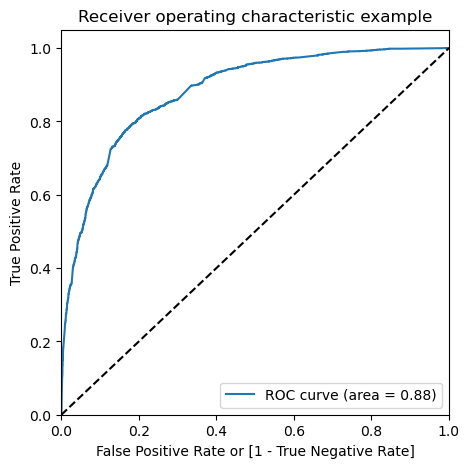

In [629]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Area under ROC cuver is 0.88 which is decent value

In [631]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.682675,1,1,1,1,1,1,1,1,0,0,0
1,1,0.899029,1,1,1,1,1,1,1,1,1,1,0
2,0,0.106025,0,1,1,0,0,0,0,0,0,0,0
3,0,0.085430,0,1,0,0,0,0,0,0,0,0,0
4,0,0.091659,0,1,0,0,0,0,0,0,0,0,0


In [632]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.378440,1.000000,0.000000
0.1,0.1,0.627911,0.971170,0.418915
0.2,0.2,0.727569,0.928571,0.605187
0.3,0.3,0.786517,0.831325,0.759235
0.4,0.4,0.811269,0.776248,0.832591
0.5,0.5,0.805081,0.662220,0.892062
0.6,0.6,0.797753,0.585198,0.927168
0.7,0.7,0.779189,0.506454,0.945245
0.8,0.8,0.756554,0.408348,0.968562
0.9,0.9,0.713890,0.262478,0.988735


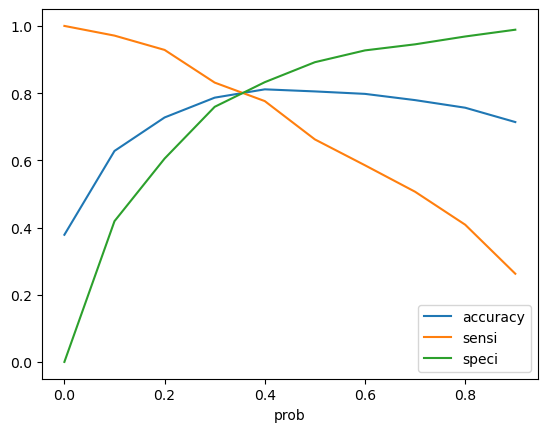

In [633]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the grapgh we can determine the optimal cutoff point as 0.35

In [635]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.682675,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.899029,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106025,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.085430,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.091659,0,1,0,0,0,0,0,0,0,0,0,0


In [636]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8032893665526787

In [637]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3057,  760],
       [ 448, 1876]], dtype=int64)

In [638]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [639]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8072289156626506

In [640]:
# Let us calculate specificity
TN / float(TN+FP)

0.8008907518993974

In [641]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19910924810060257


In [642]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7116843702579666


In [643]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8721825962910128


#### With 0.35 cut off value we have 80% accuracy, 80% Sensitivity abd 80% specificity

## Prediction on Test set

In [647]:
# Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [649]:
# Substituting all the columns in the final train model
col = X_train.columns

In [651]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,TotalVisits,Total Time Spent on Website
4595,1.0,0,0,0,0,0,0,0,0,1,0,0,0.514085,1.700195
898,1.0,0,0,0,0,1,0,0,0,0,0,0,-0.361973,-0.589381
6597,1.0,0,0,0,0,0,0,1,0,0,0,0,0.514085,-0.703217
8303,1.0,0,1,0,0,0,0,0,0,1,1,0,0.076056,-0.774824
4300,1.0,0,0,0,0,0,0,1,0,0,1,0,-0.361973,1.443145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,1.0,0,0,0,0,0,0,0,1,0,0,0,-1.238032,-0.890496
6259,1.0,0,0,0,0,0,0,0,0,1,0,0,1.828173,-0.837250
354,1.0,0,0,1,0,1,0,0,0,0,1,0,0.076056,-0.662824
1792,1.0,0,0,0,0,0,0,1,0,0,0,0,2.266202,0.392915


In [653]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.887040
1,0,0.076193
2,0,0.217904
3,0,0.116331
4,0,0.428273


In [655]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.887040,1
1,0,0.076193,0
2,0,0.217904,0
3,0,0.116331,0
4,0,0.428273,1
...,...,...,...
2627,1,0.071035,0
2628,1,0.367807,1
2629,0,0.016429,0
2630,0,0.376659,1


In [657]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7925531914893617

In [659]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1279,  338],
       [ 208,  807]], dtype=int64)

In [661]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [665]:
# Calculating the sensitivity
TP/(TP+FN)

0.7950738916256158

In [663]:
# Calculating the specificity
TN/(TN+FP)

0.7909709338280767

In [667]:
## With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision-Recall View

In [672]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3405,  412],
       [ 785, 1539]], dtype=int64)

##### Precision
TP / TP + FP

In [674]:

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7888262429523322

##### Recall
TP / TP + FN

In [677]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6622203098106713

In [683]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [679]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6136    1
 6137    0
 6138    0
 6139    0
 6140    0
 Name: Converted, Length: 6141, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6136    0
 6137    0
 6138    0
 6139    1
 6140    0
 Name: Predicted, Length: 6141, dtype: int64)

In [685]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

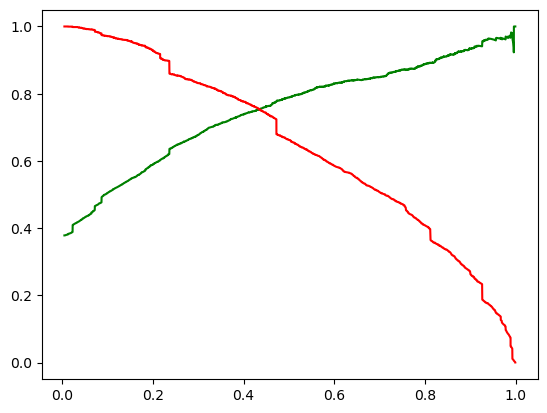

In [687]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [701]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.682675,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.899029,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106025,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.085430,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.091659,0,1,0,0,0,0,0,0,0,0,0,0


In [703]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8130597622537046

In [705]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3218,  599],
       [ 549, 1775]], dtype=int64)

In [707]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [709]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7476832350463353

In [711]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7637693631669535

#### With the current cut off as 0.42 we have Precision around 74% and Recall around 76%

### Prediction on Test set

In [717]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.887040
1,0,0.076193
2,0,0.217904
3,0,0.116331
4,0,0.428273


In [719]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.887040,1
1,0,0.076193,0
2,0,0.217904,0
3,0,0.116331,0
4,0,0.428273,1
...,...,...,...
2627,1,0.071035,0
2628,1,0.367807,0
2629,0,0.016429,0
2630,0,0.376659,0


In [721]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8028115501519757

In [723]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1338,  279],
       [ 240,  775]], dtype=int64)

In [725]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [727]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7352941176470589

In [729]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7635467980295566

#### With the current cut off as 0.42 we have Precision around 73% and Recall around 76%

In [732]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.629746
What is your current occupation_Working Professional    2.297056
Lead Source_Welingak Website                            1.905818
Last Activity_SMS Sent                                  1.381997
Total Time Spent on Website                             0.947487
Last Activity_Email Opened                              0.320416
TotalVisits                                            -0.150904
Lead Source_Organic Search                             -0.284400
Lead Source_Direct Traffic                             -0.632723
const                                                  -0.854473
Last Activity_Olark Chat Conversation                  -1.059509
Last Activity_Converted to Lead                        -1.136950
What is your current occupation_Other                  -1.176828
Last Activity_Email Bounced                            -1.615617
dtype: float64

## Conclusion

Leads generated from Add form should be closely pursued has it has chance of better conversion.
 More outreach to working professional as they have better chance of conversion
Leads from welingak website also should be followed up as those leads have better conversion
Also enusure follow up individuals with last actiivity as SMS send as they have better conversion rate